FOLD DID CONVERGE

In [2]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
import pickle

In [3]:
# FILE LOCATION OF DATA
project_folder = r'C:\Users\giova\Documents\School\Classes\Spring 2025\Capstone Project\Football2024'
data_folder_loc = r'C:\Users\giova\Documents\School\Classes\Spring 2025\Capstone Project\Data'

folds_file = r'\folds_data.csv'

In [4]:
# READ DATA
folds_df = pd.read_csv(project_folder + folds_file)

In [5]:
folds_df['FAN_PHONE_MARKETABLE1'] = (folds_df['FAN_PHONE_MARKETABLE'] == 1).astype(int)
folds_df['HAS_OPENED_EMAIL1'] = (folds_df['HAS_OPENED_EMAIL'] == 1).astype(int)
folds_df['HAS_DONATED1'] = (folds_df['HAS_DONATED'] == 1).astype(int)
folds_df['HAS_MADE_PURCHASE1'] = (folds_df['HAS_MADE_PURCHASE'] == 1).astype(int)
folds_df['DONATION_CURRENT_DONOR1'] = (folds_df['DONATION_CURRENT_DONOR'] == 1).astype(int)
folds_df['ISRESOLD1'] = (folds_df['ISRESOLD'] == 1).astype(int)
folds_df['TICKETING_CURRENTYEARSTM1'] = (folds_df['TICKETING_CURRENTYEARSTM'] == 1).astype(int)
folds_df['TICKETING_PREVSEASONSTM1'] = (folds_df['TICKETING_PREVSEASONSTM'] == 1).astype(int)
folds_df['FAN_POSTAL_MARKETABLE1'] = (folds_df['FAN_POSTAL_MARKETABLE'] == 1).astype(int)
folds_df['ISRESOLD1'] = (folds_df['ISRESOLD'] == 1).astype(int)

In [6]:
folds_df.head()

,GRMCONTACTID,EVENTNAME,SECTIONNAME,ROWNAME,SEAT,REVENUETOTAL,PLANCODE,ISMOBILE,RESOLDTOTALAMOUNT,ISATTENDED,...,fold,FAN_PHONE_MARKETABLE1,HAS_OPENED_EMAIL1,HAS_DONATED1,HAS_MADE_PURCHASE1,DONATION_CURRENT_DONOR1,ISRESOLD1,TICKETING_CURRENTYEARSTM1,TICKETING_PREVSEASONSTM1,FAN_POSTAL_MARKETABLE1
0,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. TIGERS,11,16,14,60.0,FB24,1,0.0,1,...,1,1,1,1,1,1,0,1,1,1
1,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. REBELS,11,16,15,70.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
2,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. TERRIERS,11,16,16,30.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
3,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. MONARCHS,11,16,14,35.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
4,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. REBELS,11,16,13,70.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1


In [7]:
fold1_train = folds_df[folds_df['fold'] != 1]
fold1_test = folds_df[folds_df['fold'] == 1]

In [8]:
fold2_train = folds_df[folds_df['fold'] != 2]
fold2_test = folds_df[folds_df['fold'] == 2]

In [9]:
fold3_train = folds_df[folds_df['fold'] != 3]
fold3_test = folds_df[folds_df['fold'] == 3]

In [10]:
fold4_train = folds_df[folds_df['fold'] != 4]
fold4_test = folds_df[folds_df['fold'] == 4]

In [11]:
fold5_train = folds_df[folds_df['fold'] != 5]
fold5_test = folds_df[folds_df['fold'] == 5]

In [12]:
import numpy as np

def predict_probability4(row):
    score = 2.8049  # Intercept

    # Individual features
    score += -0.1000 * row.get('DONATION_CURRENT_DONATION_AMOUNT', 0)
    score += 0.2638 * row.get('FAN_PHONE_MARKETABLE1', 0)
    score += -0.6254 * row.get('TICKETING_CURRENTYEARSTM1', 0)
    score += 0.0234 * row.get('TICKETING_PREVSEASONSTM1', 0)
    score += 0.1390 * row.get('DONATION_CURRENT_DONOR1', 0)
    score += 0.0046 * row.get('HAS_OPENED_EMAIL1', 0)
    score += 0.1264 * row.get('HAS_DONATED1', 0)
    score += 0.0291 * row.get('HAS_MADE_PURCHASE1', 0)

    # Seating color coefficients
    seat_colors = {
        'Blue': 0.1862,
        'Garnet': 0.3217,
        'Gray': -0.0434,
        'Green': 0.0419,
        'Hot Pink': 0.0893,
        'Light Blue': 0.6803,
        'Lime Green': 0.6781,
        'Other': 0.6848,
        'Pink': 0.4158,
        'Purple': 0.8331,
        'Red': 0.1166,
        'Tan': 0.8900,
        'Teal': 0.1530,
        'White': 1.2322,
        'Yellow': 0.1034
    }
    for color, coef in seat_colors.items():
        score += coef * row.get(f'SEATING{color}', 0)

    # Initial lead source
    lead_sources = {
        'GamecocksMigration': 0.0709,
        'Salesforce': -0.0693,
        'SFMC': -0.1057,
        'Ticketmaster': 0.2788
    }
    for source, coef in lead_sources.items():
        score += coef * row.get(f'FAN_INITIAL_LEAD_SOURCE{source}', 0)

    # Last lead source
    last_sources = {
        'GamecocksMigration': -0.1608,
        'Salesforce': 0.1952,
        'SFMC': -0.0987,
        'Ticketmaster': -0.1681
    }
    for source, coef in last_sources.items():
        score += coef * row.get(f'FAN_LAST_LEAD_SOURCE{source}', 0)

    score += 0.0712 * row.get('FAN_POSTAL_MARKETABLE1', 0)
    score += 0.6037 * row.get('ISRESOLD1', 0)

    # Event names
    events = {
        'VS. MONARCHS': -0.8533,
        'VS. REBELS': -0.1547,
        'VS. TERRIERS': -0.8410,
        'VS. TIGERS': -0.1589,
        'VS. ZIPS': -0.7751
    }
    for event, coef in events.items():
        score += coef * row.get(f'EVENTNAME{event}', 0)

    # Plan codes
    plans = {
        'FB24-1': -0.5117,
        'GCFREE25': -1.1965,
        'Unknown/Not Specified': -0.3360
    }
    for plan, coef in plans.items():
        score += coef * row.get(f'PLANCODE{plan}', 0)

    # Additional features
    score += -0.3516 * row.get('TICKETING_TICKETS_SCANNED', 0)
    score += 0.1787 * row.get('TICKETING_TICKET_TOTAL_SPEND', 0)
    score += -0.0983 * row.get('TICKETING_STM_TENURE', 0)
    score += 0.2147 * row.get('TICKETING_GAMES_SOLD_SECONDARY', 0)
    score += 0.6368 * row.get('TICKETING_GAMES_SCANNED', 0)
    score += -0.0088 * row.get('TICKETING_GAMES_PURCHASED_SECONDARY', 0)
    score += 1.3192 * row.get('TICKETING_ATTENDANCE_SEASON_PCT', 0)
    score += -0.0405 * row.get('TICKETING_ATTENDANCE_LIFETIME_PCT', 0)
    score += 0.0803 * row.get('REVENUETOTAL', 0)
    score += 0.0042 * row.get('RESOLDTOTALAMOUNT', 0)
    score += -0.0162 * row.get('MERCH_TOTALSPENT_LIFETIME', 0)
    score += 0.0172 * row.get('MERCH_TOTALSPENT_90DAYS', 0)
    score += -0.0806 * row.get('MERCH_TOTALSPENT_365DAYS', 0)
    score += -0.0153 * row.get('MERCH_TOTALSPENT_30DAYS', 0)

    score += 0.0127 * row.get('FAN_UNIQUE_SOURCESYSTEM_COUNT', 0)
    score += -0.1642 * row.get('ENGAGEMENT', 0)
    score += 0.0658 * row.get('EMAIL_EMAIL_OPEN_PCT', 0)
    score += 0.0375 * row.get('EMAIL_EMAIL_OPEN_COUNT', 0)
    score += 0.2957 * row.get('EMAIL_EMAIL_CLICK_PCT', 0)
    score += -0.0159 * row.get('DONATION_TOTAL_DONATION_AMOUNT', 0)
    score += -0.0651 * row.get('DONATION_MAX_DONATION_AMOUNT', 0)

    # Final prediction using sigmoid
    prob = 1 / (1 + np.exp(-score))
    return prob

In [13]:
# Updated normalization info with new means and stds
normalize_info = {
    'REVENUETOTAL': (52.71961, 27.44648),
    'RESOLDTOTALAMOUNT': (7.786976, 37.4491),
    'TICKETING_STM_TENURE': (6.679431, 6.641306),
    'TICKETING_GAMES_SCANNED': (69.96691, 262.7365),
    'TICKETING_TICKETS_SCANNED': (517.2142, 2562.268),
    'TICKETING_GAMES_SOLD_SECONDARY': (3.668276, 17.41485),
    'TICKETING_GAMES_PURCHASED_SECONDARY': (0.5510142, 1.645879),
    'TICKETING_TICKET_TOTAL_SPEND': (299224.4, 712502.8),
    'DONATION_MAX_DONATION_AMOUNT': (4299.59, 34031.81),
    'DONATION_TOTAL_DONATION_AMOUNT': (71908.37, 347889.8),
    'DONATION_CURRENT_DONATION_AMOUNT': (66639.07, 234649.2),
    'EMAIL_EMAIL_OPEN_COUNT': (356.6261, 376.5566),
    'MERCH_TOTALSPENT_30DAYS': (0.4124913, 8.221181),
    'MERCH_TOTALSPENT_90DAYS': (11.65075, 55.22247),
    'MERCH_TOTALSPENT_365DAYS': (30.33239, 108.2672),
    'MERCH_TOTALSPENT_LIFETIME': (120.4638, 319.7458),
    'EMAIL_OPEN_TIME_DIFF': (0.1189992, 6.449944),
    'DAYS_SINCE_LAST_DONATION': (177.7876, 525.1582),
    'DAYS_SINCE_LAST_PURCHASE': (191.879, 402.6674)
}

# Normalize each column
for col, (mean, std) in normalize_info.items():
    fold4_train.loc[:, col] = (fold4_train[col].astype(float) - mean) / std

C:\Users\giova\AppData\Local\Temp\ipykernel_36348\1119697603.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.40344941 -0.40344941 -0.40344941 ... -0.704595   -0.704595
 -0.704595  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fold4_train.loc[:, col] = (fold4_train[col].astype(float) - mean) / std
C:\Users\giova\AppData\Local\Temp\ipykernel_36348\1119697603.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16734222 -0.16734222 -0.16734222 ... -0.20540317 -0.20540317
 -0.20540317]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fold4_train.loc[:, col] = (fold4_train[col].astype(float) - mean) / std
C:\Users\giova\AppData\Local\Temp\ipykernel_36348\1119697603.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will rais

In [14]:
fold4_train.loc[:, 'predicted_prob'] = fold4_train.apply(predict_probability4, axis=1)

C:\Users\giova\AppData\Local\Temp\ipykernel_36348\1378434255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold4_train.loc[:, 'predicted_prob'] = fold4_train.apply(predict_probability4, axis=1)


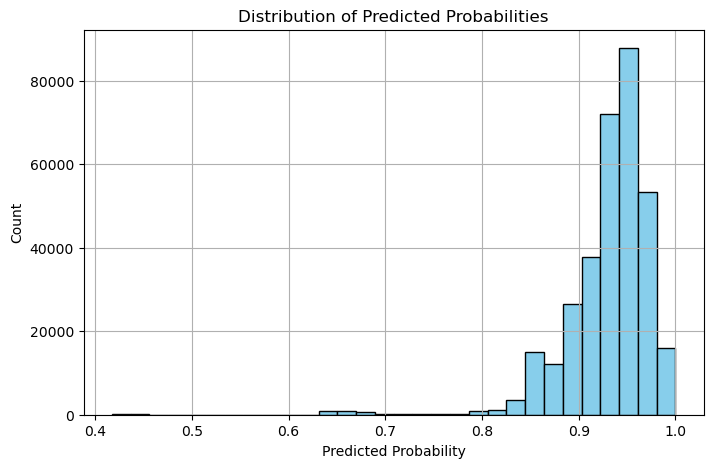

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(fold4_train['predicted_prob'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

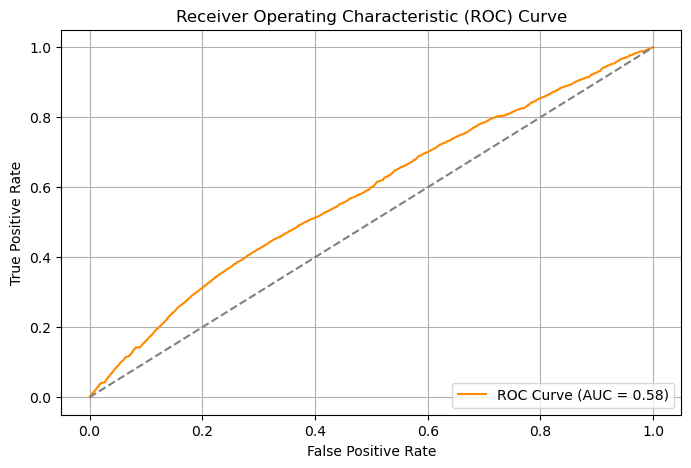

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# True labels and predicted probabilities
y_true = fold4_train['ISATTENDED']
y_scores = fold4_train['predicted_prob']

# Get false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute AUC
auc = roc_auc_score(y_true, y_scores)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [17]:
# Youden's J statistic
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best threshold based on Youden's J: {best_threshold:.4f}")

Best threshold based on Youden's J: 0.9491


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Create binary predictions
threshold = 0.8
fold4_train['predicted_label'] = (fold4_train['predicted_prob'] >= threshold).astype(int)

# Step 2: Get confusion matrix
cm = confusion_matrix(fold4_train['ISATTENDED'], fold4_train['predicted_label'])
cm

C:\Users\giova\AppData\Local\Temp\ipykernel_36348\2490549422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold4_train['predicted_label'] = (fold4_train['predicted_prob'] >= threshold).astype(int)


array([[   520,  38370],
       [  2785, 287596]], dtype=int64)

In [19]:
accuracy_score(fold4_train['ISATTENDED'], fold4_train['predicted_label'])

0.875011768421756

In [20]:
fold4_test.loc[:, 'predicted_prob'] = fold4_test.apply(predict_probability4, axis=1)

C:\Users\giova\AppData\Local\Temp\ipykernel_36348\3421698220.py:105: RuntimeWarning: overflow encountered in exp
  prob = 1 / (1 + np.exp(-score))
C:\Users\giova\AppData\Local\Temp\ipykernel_36348\2156328153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold4_test.loc[:, 'predicted_prob'] = fold4_test.apply(predict_probability4, axis=1)


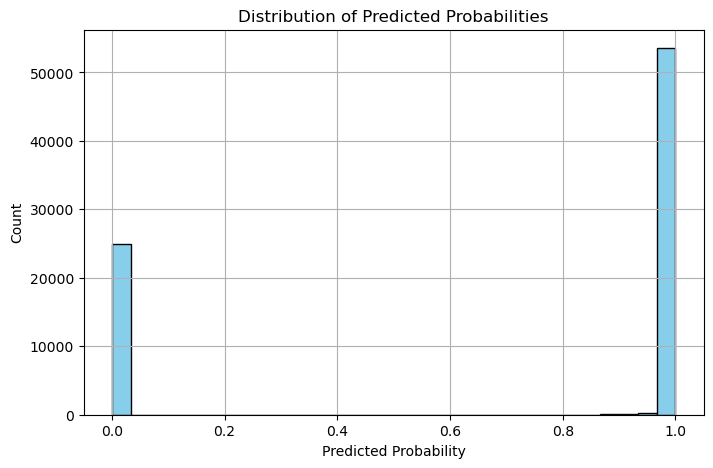

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(fold4_test['predicted_prob'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [22]:
fold4_test['predicted_label'] = (fold4_test['predicted_prob'] >= threshold).astype(int)

# Step 2: Get confusion matrix
cm = confusion_matrix(fold4_test['ISATTENDED'], fold4_test['predicted_label'])
cm

C:\Users\giova\AppData\Local\Temp\ipykernel_36348\3018568137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold4_test['predicted_label'] = (fold4_test['predicted_prob'] >= threshold).astype(int)


array([[ 6564,  6503],
       [18519, 47478]], dtype=int64)

In [23]:
accuracy_score(fold4_test['ISATTENDED'], fold4_test['predicted_label'])

0.6835222098553071